# City of Los Angeles Crime Data from 2020 to Present

## Dataset Information

Dataset is from LOS ANGELES OPEN DATA. You can access the official website with this link:  https://data.lacity.org/

Los Angeles Police Department. “Crime Data from 2020 to Present.” Public Safety | Los Angeles - Open Data Portal, 11 Oct. 2023, https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8 

## Libraries Used

In [1]:
# Import necessary libraries

import requests # Used to access the dataset

import pandas as pd # Import pandas for data manipulation

import matplotlib.pyplot as plt  # Import matplotlib library for plotting

from wordcloud import WordCloud # Used to create word cloud visualizations based on frequency data

import folium # Used for creating the map visualization

from folium.plugins import MarkerCluster  # Used for clustering markers on the map


## Accessing Dataset 

In [2]:
# You can access the dataset here: https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8

# API endpoint URL
api_url = 'https://data.lacity.org/resource/2nrs-mtv8.json'

# Make an API request

response = requests.get(api_url)

# Check the status code to ensure the request was successful 
if response.status_code == 200:
    data = response.json() # Parse JSON data
    crime = pd.DataFrame(data) # Convert JSON data to a DataFrame
else:
    print(f'Failed to retrieve data. Status code:{response.status_code}')

In [3]:
# Display the first few rows of the 'crime' DataFrame to get a quick look at the data

crime.head()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,...,weapon_used_cd,weapon_desc,status,status_desc,crm_cd_1,location,lat,lon,crm_cd_2,cross_street
0,010304468,2020-01-08T00:00:00.000,2020-01-08T00:00:00.000,2230,03,Southwest,0377,2,624,BATTERY - SIMPLE ASSAULT,...,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624,1100 W 39TH PL,34.0141,-118.2978,NaN,NaN
1,190101086,2020-01-02T00:00:00.000,2020-01-01T00:00:00.000,0330,01,Central,0163,2,624,BATTERY - SIMPLE ASSAULT,...,500,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624,700 S HILL ST,34.0459,-118.2545,NaN,NaN
2,200110444,2020-04-14T00:00:00.000,2020-02-13T00:00:00.000,1200,01,Central,0155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,NaN,NaN,AA,Adult Arrest,845,200 E 6TH ST,34.0448,-118.2474,NaN,NaN
3,191501505,2020-01-01T00:00:00.000,2020-01-01T00:00:00.000,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,NaN,NaN,IC,Invest Cont,745,5400 CORTEEN PL,34.1685,-118.4019,998,NaN
4,191921269,2020-01-01T00:00:00.000,2020-01-01T00:00:00.000,0415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,NaN,NaN,IC,Invest Cont,740,14400 TITUS ST,34.2198,-118.4468,NaN,NaN


## Description of Columns in this Dataset:

DR_NO: Unique incident identifier.

Date Rptd: Date when the incident was reported.

DATE OCC: Date when the incident occurred.

TIME OCC: Time of day when the incident occurred.

AREA: Numeric code indicating the incident area.

AREA NAME: Name of the incident area.

Rpt Dist No: Reporting district within the area.

Part 1-2: Classification of the incident as Part 1 or Part 2 crime.

Crm Cd: Numeric code for the type of crime.

Crm Cd Desc: Description of the crime.

Mocodes: Codes describing the modus operandi of the crime.

Vict Age, Vict Sex, Vict Descent: Victim demographics.

Premis Cd: Numeric code for the incident location.

Premis Desc: Description of the incident location.

Weapon Used Cd: Code indicating weapon use.

Weapon Desc: Description of the weapon used.

Status: Incident status.

Status Desc: Description of the incident status.

Crm Cd 1-4: Additional related crime codes.

LOCATION: Approximate incident location.

Cross Street: Nearest cross street.

LAT: Latitude coordinate.

LON: Longitude coordinate.

## Dataset Exploration

In [4]:
# Generate statistical summary for all columns in the 'crime' DataFrame, including non-numeric ones

crime.describe(include='all', datetime_is_numeric=True)

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,...,weapon_used_cd,weapon_desc,status,status_desc,crm_cd_1,location,lat,lon,crm_cd_2,cross_street
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,389,389,1000,1000,1000,1000,1000,1000,76,256
unique,1000,201,173,275,21,21,223,2,64,64,...,30,30,4,4,64,525,369,413,9,113
top,010304468,2020-01-26T00:00:00.000,2020-01-11T00:00:00.000,1200,01,Central,0162,1,330,BURGLARY FROM VEHICLE,...,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,330,700 W 7TH ST,34.0480,-118.2577,998,LOS ANGELES
freq,1,47,42,38,794,794,90,584,127,127,...,224,224,834,834,127,34,36,34,63,13


In [5]:
# Display information about the 'crime' DataFrame, including data types and non-null counts
# This is useful for understanding the dataset's structure and checking for missing values

crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   dr_no           1000 non-null   object
 1   date_rptd       1000 non-null   object
 2   date_occ        1000 non-null   object
 3   time_occ        1000 non-null   object
 4   area            1000 non-null   object
 5   area_name       1000 non-null   object
 6   rpt_dist_no     1000 non-null   object
 7   part_1_2        1000 non-null   object
 8   crm_cd          1000 non-null   object
 9   crm_cd_desc     1000 non-null   object
 10  mocodes         928 non-null    object
 11  vict_age        1000 non-null   object
 12  vict_sex        936 non-null    object
 13  vict_descent    936 non-null    object
 14  premis_cd       1000 non-null   object
 15  premis_desc     1000 non-null   object
 16  weapon_used_cd  389 non-null    object
 17  weapon_desc     389 non-null    object
 18  status   

## Data Cleaning

In [6]:
# Convert the columns in the 'crime' DataFrame to the correct data type
crime['date_rptd'] = crime['date_rptd'].astype('datetime64[ns]')
crime['date_occ'] = crime['date_occ'].astype('datetime64[ns]')

In [7]:
# Convert 'TIME OCC' column to string type
crime['time_occ'] = crime['time_occ'].astype(str)

# Ensure all times are of length 4, filling with leading zeroes if necessary
crime['time_occ'] = crime['time_occ'].str.zfill(4)

# Insert a colon ':' between hours and minutes
crime['time_occ'] = crime['time_occ'].str.replace(r'(\d{2})(\d{2})', r'\1:\2', regex=True)


In [8]:
# Display info after conversion
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   dr_no           1000 non-null   object        
 1   date_rptd       1000 non-null   datetime64[ns]
 2   date_occ        1000 non-null   datetime64[ns]
 3   time_occ        1000 non-null   object        
 4   area            1000 non-null   object        
 5   area_name       1000 non-null   object        
 6   rpt_dist_no     1000 non-null   object        
 7   part_1_2        1000 non-null   object        
 8   crm_cd          1000 non-null   object        
 9   crm_cd_desc     1000 non-null   object        
 10  mocodes         928 non-null    object        
 11  vict_age        1000 non-null   object        
 12  vict_sex        936 non-null    object        
 13  vict_descent    936 non-null    object        
 14  premis_cd       1000 non-null   object        
 15  premi

In [9]:
crime.head()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,...,weapon_used_cd,weapon_desc,status,status_desc,crm_cd_1,location,lat,lon,crm_cd_2,cross_street
0,010304468,2020-01-08,2020-01-08,22:30,03,Southwest,0377,2,624,BATTERY - SIMPLE ASSAULT,...,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624,1100 W 39TH PL,34.0141,-118.2978,NaN,NaN
1,190101086,2020-01-02,2020-01-01,03:30,01,Central,0163,2,624,BATTERY - SIMPLE ASSAULT,...,500,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624,700 S HILL ST,34.0459,-118.2545,NaN,NaN
2,200110444,2020-04-14,2020-02-13,12:00,01,Central,0155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,NaN,NaN,AA,Adult Arrest,845,200 E 6TH ST,34.0448,-118.2474,NaN,NaN
3,191501505,2020-01-01,2020-01-01,17:30,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,NaN,NaN,IC,Invest Cont,745,5400 CORTEEN PL,34.1685,-118.4019,998,NaN
4,191921269,2020-01-01,2020-01-01,04:15,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,NaN,NaN,IC,Invest Cont,740,14400 TITUS ST,34.2198,-118.4468,NaN,NaN


In [10]:
# Generate statistical summary for all columns in the 'crime' DataFrame, including non-numeric ones

crime.describe(include='all', datetime_is_numeric=True)

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,...,weapon_used_cd,weapon_desc,status,status_desc,crm_cd_1,location,lat,lon,crm_cd_2,cross_street
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,389,389,1000,1000,1000,1000,1000,1000,76,256
unique,1000,NaN,NaN,275,21,21,223,2,64,64,...,30,30,4,4,64,525,369,413,9,113
top,010304468,NaN,NaN,12:00,01,Central,0162,1,330,BURGLARY FROM VEHICLE,...,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,330,700 W 7TH ST,34.0480,-118.2577,998,LOS ANGELES
freq,1,NaN,NaN,38,794,794,90,584,127,127,...,224,224,834,834,127,34,36,34,63,13
mean,NaN,2020-03-24 09:02:52.800000,2020-02-23 23:00:57.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2020-01-01 00:00:00,2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2020-01-11 00:00:00,2020-01-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2020-01-19 00:00:00,2020-01-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2020-01-28 00:00:00,2020-01-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,2022-08-18 00:00:00,2020-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
print(crime.columns) 


Index(['dr_no', 'date_rptd', 'date_occ', 'time_occ', 'area', 'area_name',
       'rpt_dist_no', 'part_1_2', 'crm_cd', 'crm_cd_desc', 'mocodes',
       'vict_age', 'vict_sex', 'vict_descent', 'premis_cd', 'premis_desc',
       'weapon_used_cd', 'weapon_desc', 'status', 'status_desc', 'crm_cd_1',
       'location', 'lat', 'lon', 'crm_cd_2', 'cross_street'],
      dtype='object')


In [12]:
# Number of rows and columns

print(crime.shape)

(1000, 26)


In [13]:
# Check for missing values
crime.isnull().sum()

dr_no               0
date_rptd           0
date_occ            0
time_occ            0
area                0
area_name           0
rpt_dist_no         0
part_1_2            0
crm_cd              0
crm_cd_desc         0
mocodes            72
vict_age            0
vict_sex           64
vict_descent       64
premis_cd           0
premis_desc         0
weapon_used_cd    611
weapon_desc       611
status              0
status_desc         0
crm_cd_1            0
location            0
lat                 0
lon                 0
crm_cd_2          924
cross_street      744
dtype: int64

In [14]:
# Dropping the 'cross_street' column since there is 742 missing entries out of 1000,no crucial for my data analysis
crime.drop(columns=['cross_street'], inplace=True)

## Data Analysis

### Types of Crime

What are the most common crime types, and how frequently do they occur?

In [15]:
# Calculate the count of each unique crime description in the 'crm_cd_desc'
crime_counts = crime['crm_cd_desc'].value_counts()

# Display the count of occurrences for each unique crime description
print(crime_counts)

BURGLARY FROM VEHICLE                                       127
BATTERY - SIMPLE ASSAULT                                    118
THEFT PLAIN - PETTY ($950 & UNDER)                           75
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)      53
VEHICLE - STOLEN                                             51
                                                           ... 
CHILD STEALING                                                1
SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ      1
EXTORTION                                                     1
THROWING OBJECT AT MOVING VEHICLE                             1
CONTEMPT OF COURT                                             1
Name: crm_cd_desc, Length: 64, dtype: int64


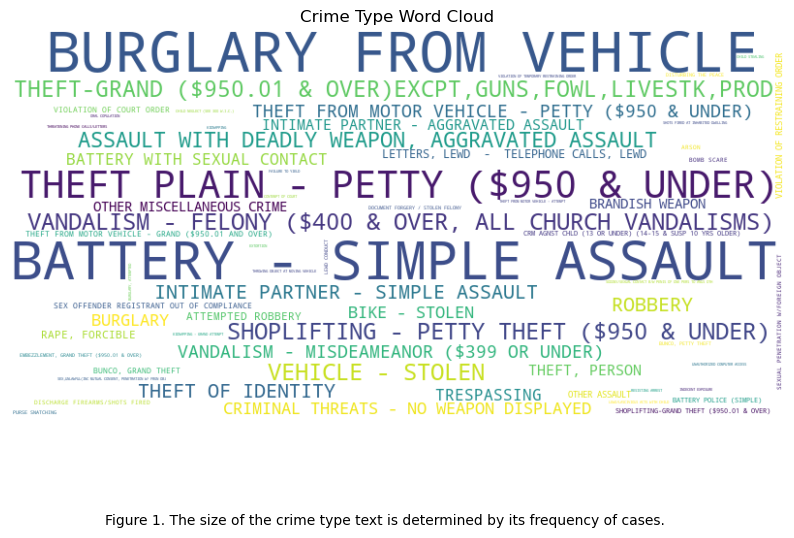

In [16]:
# Convert the crime counts to a dictionary for word cloud generation
crime_counts_dict = crime_counts.to_dict()

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(crime_counts_dict)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis
plt.title('Crime Type Word Cloud')

# Adding a description to the graph
plt.text(0.5, 0 , "Figure 1. The size of the crime type text is determined by its frequency of cases.", ha='center', va='center',  transform=plt.gcf().transFigure)

# Save the plot as a PNG file
plt.savefig('../reports/figures/crime_type_wordcloud.png', bbox_inches='tight')

plt.show()


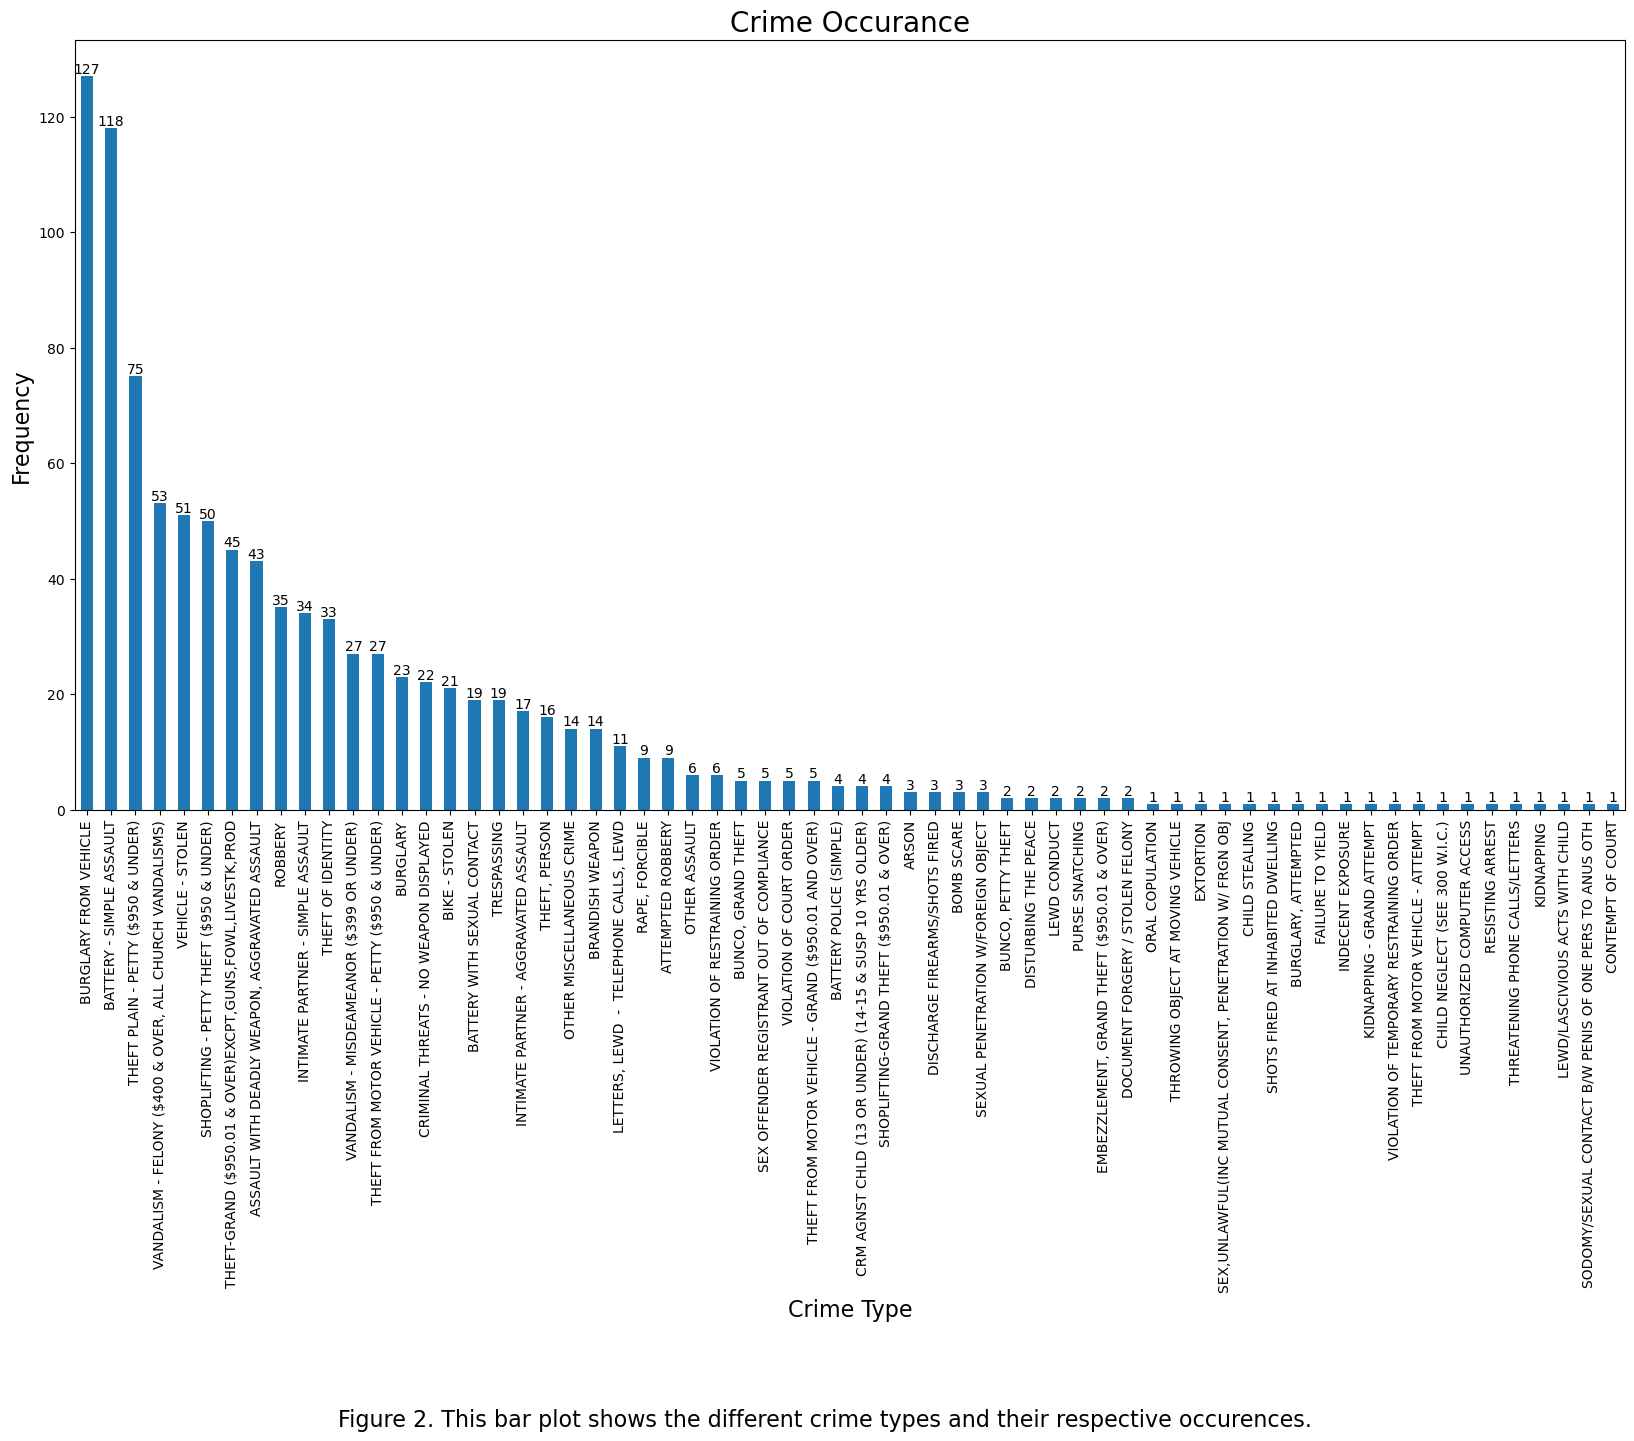

In [17]:
# Sort crime counts in descending order
sorted_counts = crime_counts.sort_values(ascending=False)

# Set a larger figure size for better visibility
plt.figure(figsize=(20, 10))

# Creating a bar plot of sorted crime counts
bars = sorted_counts.plot(kind='bar')


# Display count values on top of each bar
for bar, count in zip(bars.patches, sorted_counts):
    bars.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count, ha='center', va='bottom')

# Title and axis labels
plt.title('Crime Occurance', fontsize=20)
plt.xlabel('Crime Type', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

# Adding a description to the wordcloud
plt.text(0.5, -0.5, "Figure 2. This bar plot shows the different crime types and their respective occurences.", ha='center', va='center', fontsize=16, transform=plt.gcf().transFigure)

# Save the plot as a PNG file
plt.savefig('../reports/figures/crime_types_and_frequency.png', bbox_inches='tight')

plt.show()

### Top 10 crime types in Los Angeles, California

In [21]:
# Top 10 crime types and occurrences

crime_counts.head(10)

BURGLARY FROM VEHICLE                                       127
BATTERY - SIMPLE ASSAULT                                    118
THEFT PLAIN - PETTY ($950 & UNDER)                           75
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)      53
VEHICLE - STOLEN                                             51
SHOPLIFTING - PETTY THEFT ($950 & UNDER)                     50
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD     45
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT               43
ROBBERY                                                      35
INTIMATE PARTNER - SIMPLE ASSAULT                            34
Name: crm_cd_desc, dtype: int64

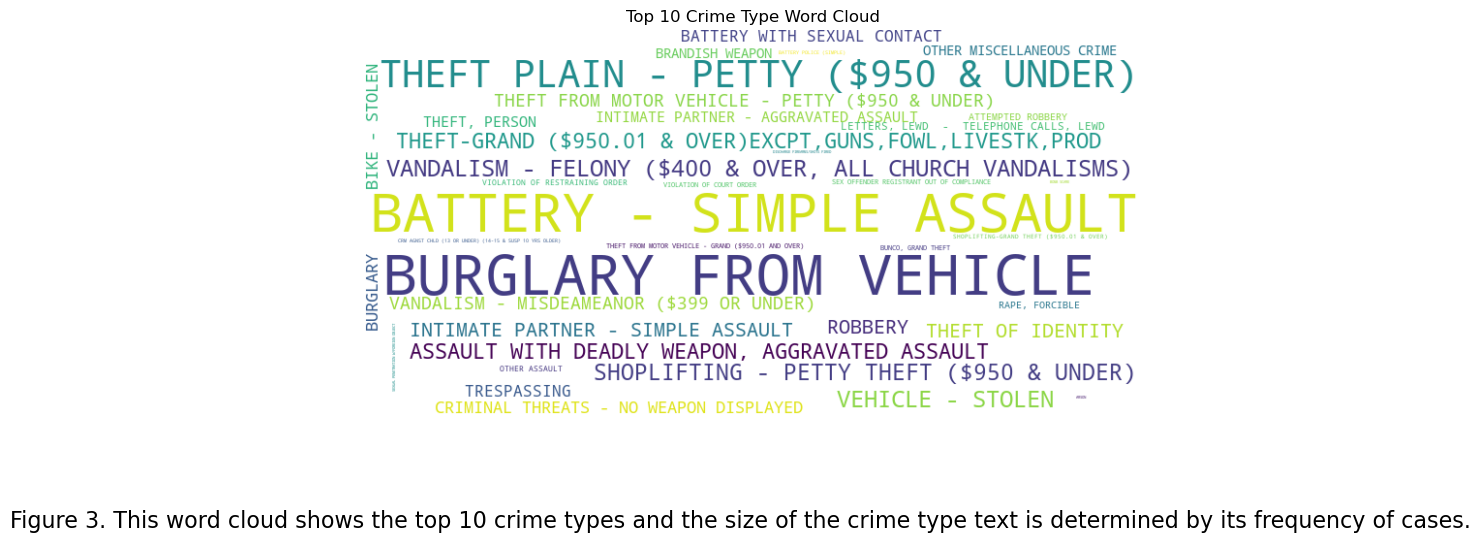

In [23]:
# Convert the top 10 crime counts to a dictionary for word cloud generation
top_10_crime_counts_dict = crime_counts.to_dict()

# Create the word cloud for the top 10 crime types
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_10_crime_counts_dict)

# Display the word cloud for the top 10 crime types
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis
plt.title('Top 10 Crime Type Word Cloud')

# Adding a description to the wordcloud
plt.text(0.5, 0, "Figure 3. This word cloud shows the top 10 crime types and the size of the crime type text is determined by its frequency of cases.", ha='center', va='center', fontsize=16, transform=plt.gcf().transFigure)

# Save the plot as a PNG file
plt.savefig('../reports/figures/top_10_crime_wordcloud.png', bbox_inches='tight')

plt.show()

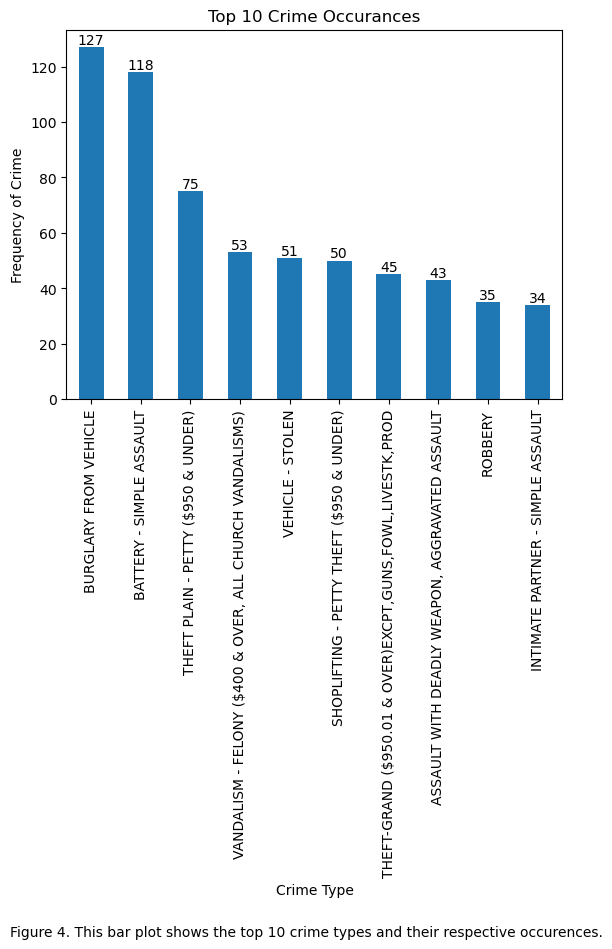

In [24]:
# Sort crime counts in descending order and select the top 10
top_10_crime_counts = crime_counts.head(10)

# Bar chart top 10

# Creating a bar plot of the top 10 crime counts
bars = top_10_crime_counts.plot(kind='bar')

# Display count values on top of each bar
for bar, count in zip(bars.patches, top_10_crime_counts):
    bars.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count, ha='center', va='bottom')

# Title and axis labels
plt.title('Top 10 Crime Occurances')
plt.xlabel('Crime Type')
plt.ylabel('Frequency of Crime')

# Adding a description to the graph
plt.text(0.5, -1, "Figure 4. This bar plot shows the top 10 crime types and their respective occurences.", ha='center', va='center', fontsize=10, transform=plt.gcf().transFigure)

# Save the plot as a PNG file
plt.savefig('../reports/figures/top_10_crime_types_and_frequency.png', bbox_inches='tight')

plt.show()

### Weapons Used in Crimes

Are weapons commonly employed in these incidents, and if so, which types are prevalent?

In [25]:
# Calculate the count of each unique weapon description in the 'weapon_desc'
weapon_counts = crime['weapon_desc'].value_counts()

# Display the amount of time each unique weapon was used
print(weapon_counts)

STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    224
UNKNOWN WEAPON/OTHER WEAPON                        64
VERBAL THREAT                                      18
HAND GUN                                           11
OTHER KNIFE                                        11
KNIFE WITH BLADE 6INCHES OR LESS                    6
KNIFE WITH BLADE OVER 6 INCHES IN LENGTH            4
MACHETE                                             4
SEMI-AUTOMATIC PISTOL                               4
BLUNT INSTRUMENT                                    4
ROCK/THROWN OBJECT                                  4
SCISSORS                                            3
BOTTLE                                              3
PIPE/METAL PIPE                                     3
FIRE                                                3
SIMULATED GUN                                       3
FOLDING KNIFE                                       2
PHYSICAL PRESENCE                                   2
MACE/PEPPER SPRAY           

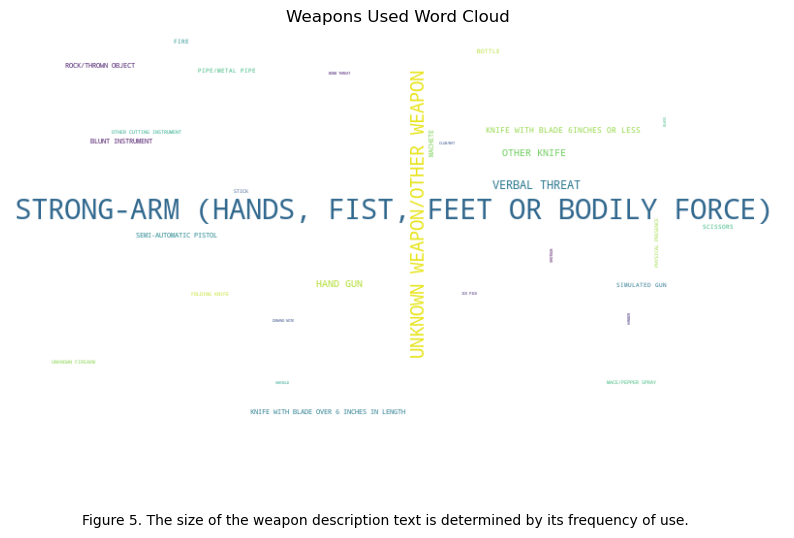

In [26]:
# Convert the weapons count to a dictionary for word cloud generation
weapon_counts_dict = weapon_counts.to_dict()

# Create the weapons word cloud
weapon_wordcloud = WordCloud(width=800, height=400, background_color='white', max_font_size=50000).generate_from_frequencies(weapon_counts_dict)

# Display the weapon word cloud
plt.figure(figsize=(10, 6))
plt.imshow(weapon_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Weapons Used Word Cloud')

# Adding a description to the graph
plt.text(0.5, 0 , "Figure 5. The size of the weapon description text is determined by its frequency of use.", ha='center', va='center',  transform=plt.gcf().transFigure)


# Save the plot as a PNG file
plt.savefig('../reports/figures/weapons_wordcloud.png', bbox_inches='tight')

plt.show()

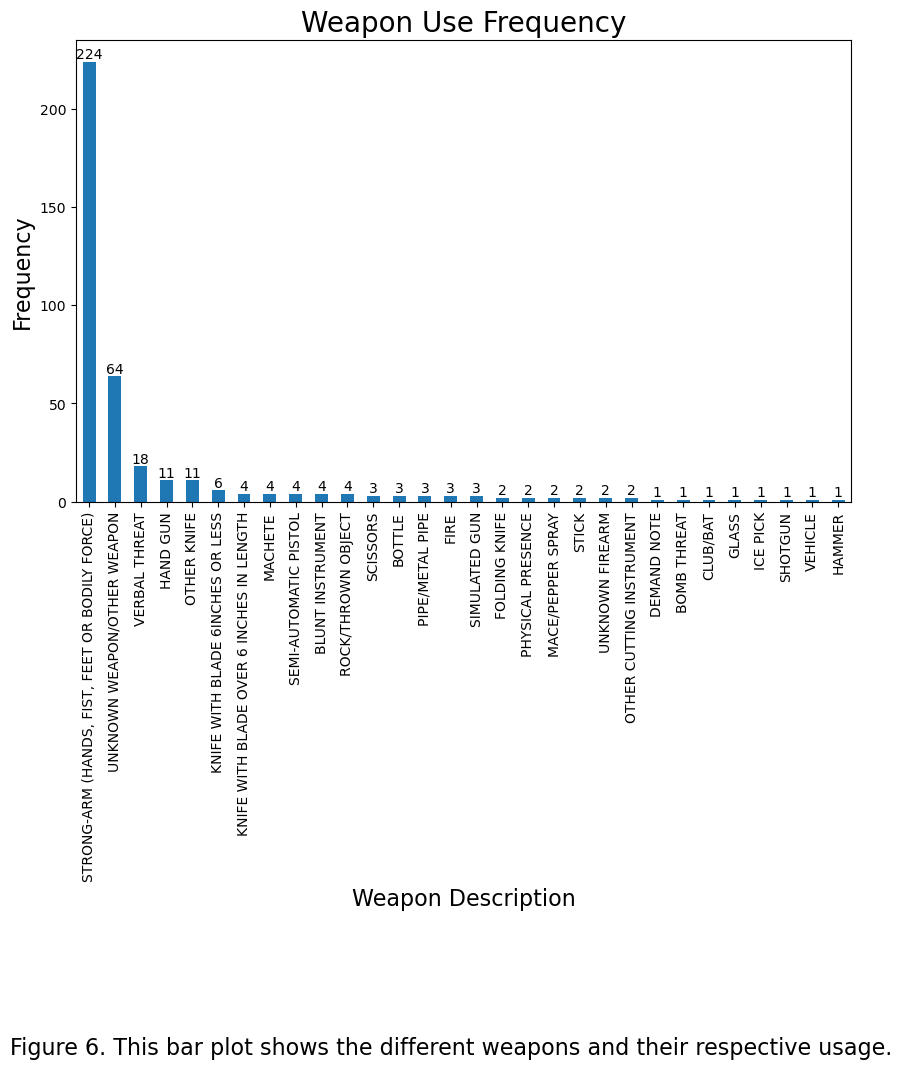

In [27]:
# Creating a bar plot of weapon counts
plt.figure(figsize=(10, 6))
bars = weapon_counts.plot(kind='bar')

# Display count values on top of each bar
for bar, count in zip(bars.patches, weapon_counts):
    bars.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count, ha='center', va='bottom')
                          

# Title and axis labels
plt.title('Weapon Use Frequency', fontsize=20)
plt.xlabel('Weapon Description', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

# Adding a description to the wordcloud
plt.text(0.5, -0.8, "Figure 6. This bar plot shows the different weapons and their respective usage.", ha='center', va='center', fontsize=16, transform=plt.gcf().transFigure)

# Save the plot as a PNG file
plt.savefig('../reports/figures/weapons_usage.png', bbox_inches='tight')

plt.show()                         
                          

### Top 5 weapons use to commit a crime

In [28]:
# Top 5 weapons used

weapon_counts.head(5)

STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    224
UNKNOWN WEAPON/OTHER WEAPON                        64
VERBAL THREAT                                      18
HAND GUN                                           11
OTHER KNIFE                                        11
Name: weapon_desc, dtype: int64

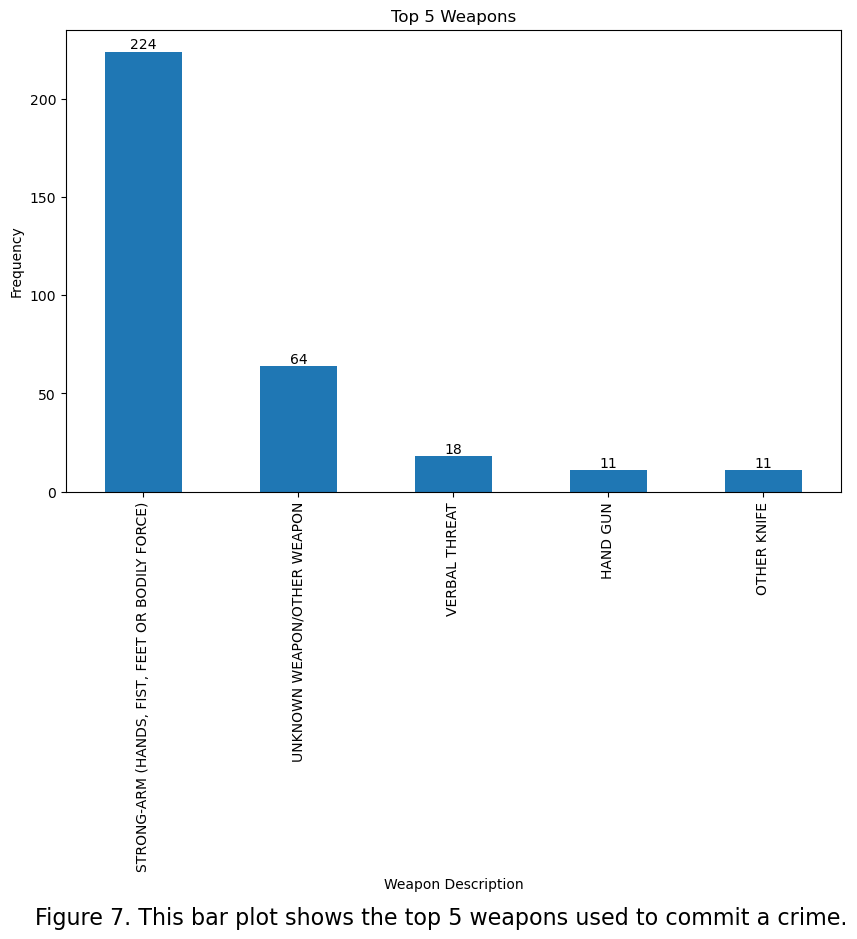

In [29]:
# Plotting the top 5 weapons used to commit a crime
top_5_weapons = weapon_counts.head(5)

plt.figure(figsize=(10, 6))
bars = top_5_weapons.plot(kind='bar')
plt.title('Top 5 Weapons')
plt.xlabel('Weapon Description')
plt.ylabel('Frequency')


# Display count values on top of each bar
for bar, count in zip(bars.patches, weapon_counts):
    bars.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count, ha='center', va='bottom')

# Adding a description to the wordcloud
plt.text(0.5, -0.6, "Figure 7. This bar plot shows the top 5 weapons used to commit a crime.", ha='center', va='center', fontsize=16, transform=plt.gcf().transFigure)
    
# Save the plot as a PNG file
plt.savefig('../reports/figures/top_5_weapons.png', bbox_inches='tight')

plt.show()

## Crime Analysis based on time

### Crime by Month

When are crimes most prevalent throughout the year?

In [30]:
# Group incidents by month

# Calculate the crime rate for each month


In [31]:
# Line Graph


In [32]:
# Bar Chart 


### Crime by Day of Week

Is there any difference between weekday and weekend? What about the type of crime?

In [33]:
## Calculate the percentage of crime per day of week 

In [34]:
# Pie chart

### Crime by Time of Day

What times of the day witness higher crime incident rates?

In [35]:
# Group incidents by time of day (e.g., morning, afternoon, evening, night)

# Calculate the frequency of incidents for each time period

In [36]:
# 

## Crime analysis based on the location

### Crime by Location

Which areas experience the highest rates of crime?

Where do crimes typically occur, such as on the streets, in vehicles, buildings, or in the outskirts of the city?

In [37]:
# Map Displaying the crimes by location
# Create a base map centered at a specific location
crime_map = folium.Map(location=[34.052235, -118.243683], zoom_start=11)

# Create a Marker Cluster to group the crime locations
marker_cluster = MarkerCluster().add_to(crime_map)

# Iterate through the dataset to add markers for each crime location
for lat, lon in zip(crime['lat'], crime['lon']):
    folium.Marker(location=[lat, lon], popup='Crime Scene').add_to(marker_cluster)

# Display the map
crime_map

In [38]:
# Calculate the count of each unique location in the 'area_name'
crime_location = crime['area_name'].value_counts()

# Display the clocation of the crime scenes
print(crime_location)

Central        794
West LA         21
Harbor          19
Hollywood       17
Hollenbeck      16
Rampart         16
Southwest       14
Northeast       14
Van Nuys        14
West Valley     14
Wilshire        11
Southeast       10
77th Street      9
Pacific          6
Devonshire       6
Foothill         5
Olympic          5
Mission          3
Newton           3
N Hollywood      2
Topanga          1
Name: area_name, dtype: int64


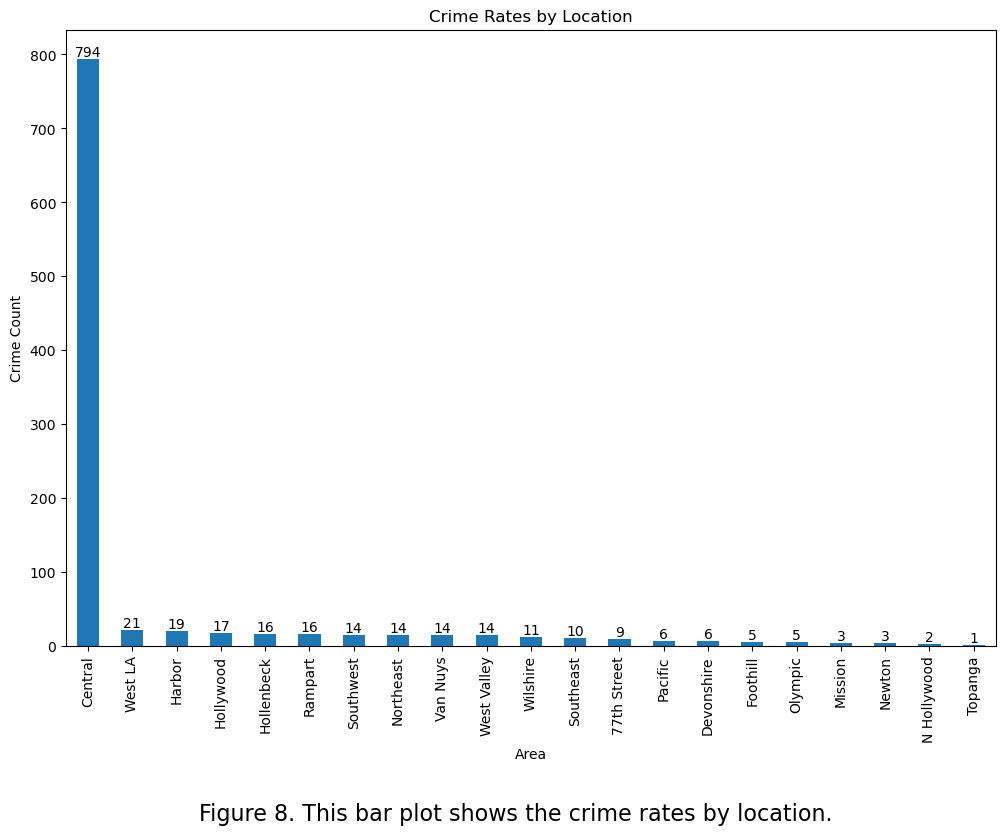

In [39]:

# Plotting all areas with their crime rates
plt.figure(figsize=(12, 8))
bars = crime_location.plot(kind='bar')
plt.title('Crime Rates by Location')
plt.xlabel('Area')
plt.ylabel('Crime Count')

# Display count values on top of each bar
for bar, count in zip(bars.patches, crime_location):
    bars.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count, ha='center', va='bottom')

# Adding a description to the wordcloud
plt.text(0.5, -0.1, "Figure 8. This bar plot shows the crime rates by location.", ha='center', va='center', fontsize=16, transform=plt.gcf().transFigure)
    
# Save the plot as a PNG file
plt.savefig('../reports/figures/crime_rates_by_loaction.png', bbox_inches='tight')

plt.show()

### Top 10 area with the highest crime rates in Los Angeles, California

In [40]:
# top 10 areas with the highest crime rates
crime_location.head(10)

Central        794
West LA         21
Harbor          19
Hollywood       17
Hollenbeck      16
Rampart         16
Southwest       14
Northeast       14
Van Nuys        14
West Valley     14
Name: area_name, dtype: int64

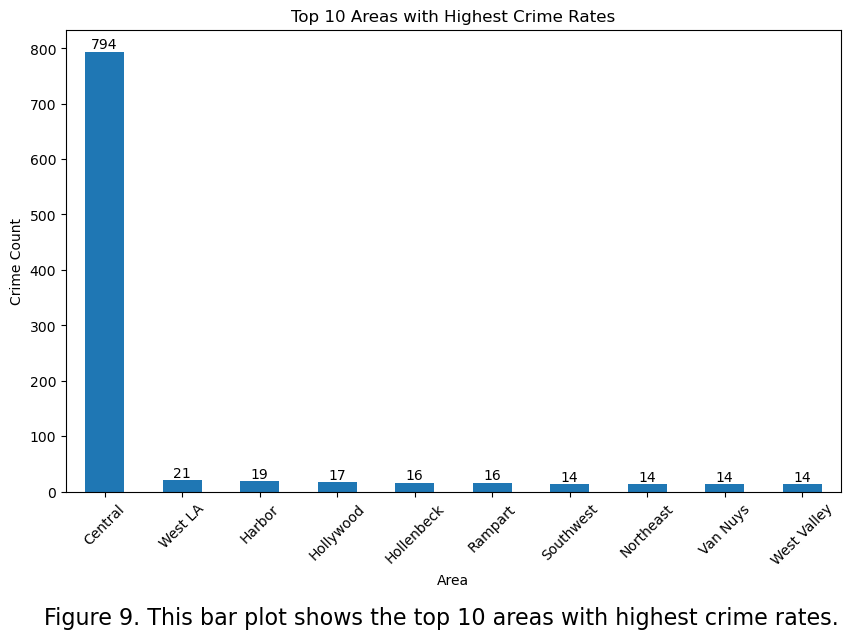

In [41]:
# Plotting the top 10 areas with the highest crime rates
top_10_crime_areas = crime_location.head(10)

plt.figure(figsize=(10, 6))
bars = top_10_crime_areas.plot(kind='bar')
plt.title('Top 10 Areas with Highest Crime Rates')
plt.xlabel('Area')
plt.ylabel('Crime Count')
plt.xticks(rotation=45)

# Display count values on top of each bar
for bar, count in zip(bars.patches, crime_location):
    bars.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count, ha='center', va='bottom')

# Adding a description to the wordcloud
plt.text(0.5, -0.1, "Figure 9. This bar plot shows the top 10 areas with highest crime rates.", ha='center', va='center', fontsize=16, transform=plt.gcf().transFigure)
    
# Save the plot as a PNG file
plt.savefig('../reports/figures/top_10_area_with_highest_crime_rates.png', bbox_inches='tight')

plt.show()

## Crime Analysis based on Demographic 

### Gender Disparities in Crime

What is the distribution of crime victims by assigned sex?

Is there a significant difference in victim count by sex?

In [42]:
# Calculate the count of each unique victims sex in the 'vict_sex'
victims_sex = crime['vict_sex'].value_counts()

# Display the sex of victims

print(victims_sex)

M    508
F    360
X     68
Name: vict_sex, dtype: int64


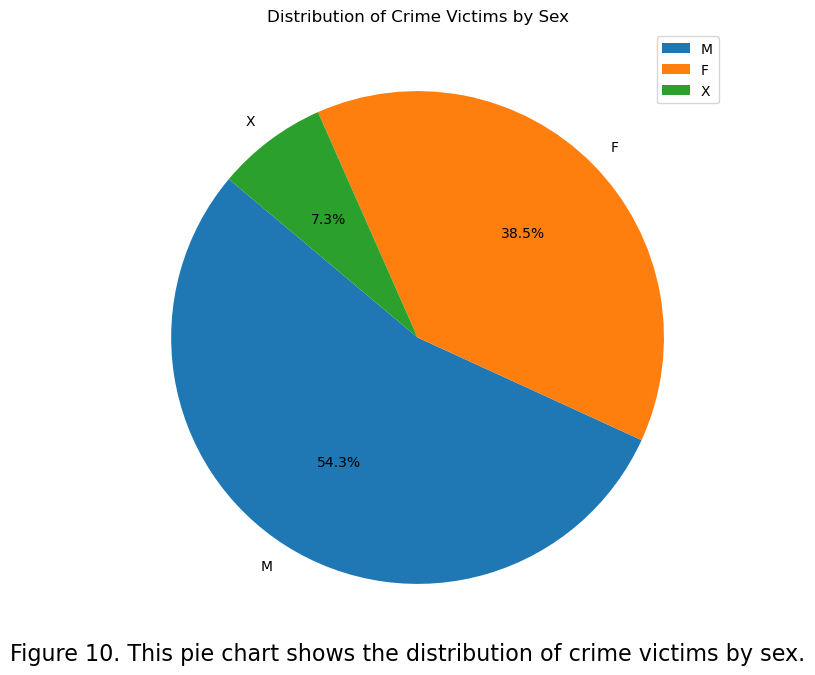

In [43]:
# Pie chart to display the distribution of crime victims by sex

# Data for the pie chart
labels = victims_sex.index  # Victim sex categories (M, F, X)
sizes = victims_sex.values  # Counts of each victim sex category

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Crime Victims by Sex')
plt.legend(labels, loc="best")

# Adding a description to the bar graph
plt.text(0.5, 0.1, "Figure 10. This pie chart shows the distribution of crime victims by sex.", ha='center', va='center', fontsize=16, transform=plt.gcf().transFigure)

# Save the plot as a PNG file
plt.savefig('../reports/figures/victims_sex_distribution.png', bbox_inches='tight')

plt.show()

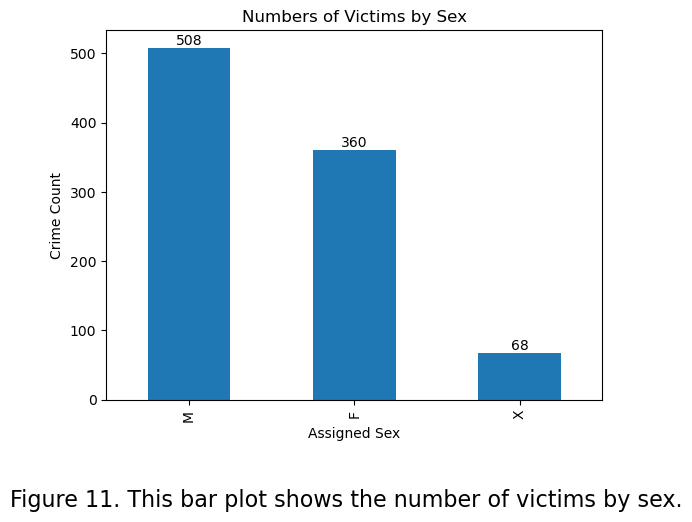

In [44]:
# Compare the number victims by sex.

plt.figure()
bars = victims_sex.plot(kind='bar')
plt.title('Numbers of Victims by Sex')
plt.xlabel('Assigned Sex')
plt.ylabel('Crime Count')

# Display count values on top of each bar
for bar, count in zip(bars.patches, victims_sex):
    bars.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count, ha='center', va='bottom')
    
# Adding a description to the bar graph
plt.text(0.5, -0.1, "Figure 11. This bar plot shows the number of victims by sex.", ha='center', va='center', fontsize=16, transform=plt.gcf().transFigure)
    
# Save the plot as a PNG file
plt.savefig('../reports/figures/victims_sex.png', bbox_inches='tight')

plt.show()


### Age of Victims

What is the statitical data on the ages of crime victims?

In [59]:
# Age of Victims
victims_age = crime['vict_age'].value_counts()

print("Age of Victims")

print(victims_age)

Age of Victims
0     166
23     32
26     31
27     31
38     30
     ... 
85      1
81      1
79      1
94      1
73      1
Name: vict_age, Length: 74, dtype: int64


In [66]:
# To-Do: Clean data and get rid of invalid ages to get a more reasonable average/ mode

In [65]:
# Display statistical data on the ages of crime victims
print("Statistical Data on Ages of Crime Victims:")

# The average age of victims
average_victims_age = crime['vict_age'].mean()
print(f"\nAverage Age of Victims: {average_victims_age:.2f} years")

# The mode age of victims
mode_victims_age = crime['vict_age'].mode()

# Check if there is more than one mode
if len(mode_victims_age) > 0:
    print(f"Mode Age(s) of Victims: {', '.join(map(str, mode_victims_age))} years")
else:
    print("No mode found for Victim Age.")
    
# print(mode_victims_age)

# The median age of victims
median_victims_age = crime['vict_age'].median()
print(f"Median Age of Victims: {median_victims_age:.2f} years")

Statistical Data on Ages of Crime Victims:

Average Age of Victims: inf years
Mode Age(s) of Victims: 0 years
Median Age of Victims: 32.00 years


### Ethnicity and Crime

Which ethnic groups are most affected by crime?

In [68]:
victims_ethnicity = crime['vict_descent'].value_counts()

print(victims_ethnicity)

H    304
W    231
B    188
O     83
X     71
A     45
C      5
F      4
K      4
I      1
Name: vict_descent, dtype: int64


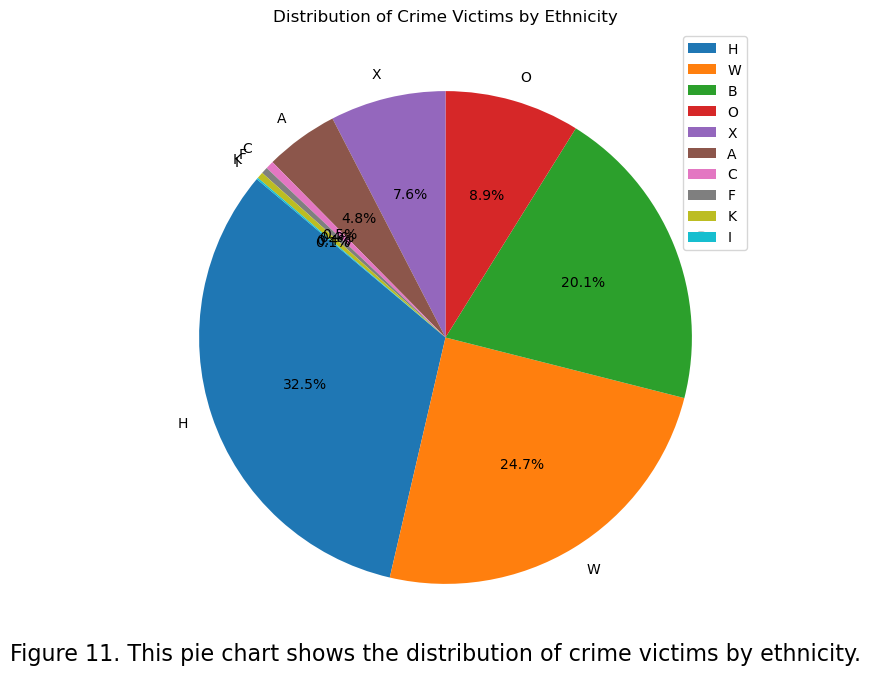

In [69]:
# Pie chart to display the distribution of crime victims by ethnicity

# Data for the pie chart
labels = victims_ethnicity.index  # Victim ethnicity categories 
sizes = victims_ethnicity.values  # Counts of each victim ethnicity category

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Crime Victims by Ethnicity')
plt.legend(labels, loc="best")

# Adding a description to the bar graph
plt.text(0.5, 0.1, "Figure 11. This pie chart shows the distribution of crime victims by ethnicity.", ha='center', va='center', fontsize=16, transform=plt.gcf().transFigure)

# Save the plot as a PNG file
plt.savefig('../reports/figures/victims_ethnicity_distribution.png', bbox_inches='tight')

plt.show()

## Crime Resolution 

### Crime Offense Level
misdemeanor, felony, violation?

In [46]:
# Crime level with its counts

# Bar chart

In [47]:
# Pie Chart

### Response Time

Examine the average response times of law enforcement to different types of incidents.

### Crime Resolution Rate

What is the percentage of solved cases versus open cases?